# Data Prep
Dataset found on Confluence
1. Convert all text data into quantizable data, so use mapping to change {a,b,c} into {1,2,3}.
* TOOLS TO DO THIS: LabelEncoder
2. Then scale the data that way they all are around the same range. Instead of having 1-1000 range on one column, and 0-1 range on one column, we try to keep it consistent.
* TOOLS TO DO THIS: StandardScaler
3. Get rid of biases. If there are 500 samples for the output 1-10 days and 2 samples for the 21-30 days sample, the model will be more "educated" on the 1-10 days output. So we need to make sure the data is evenly distributed.
* TOOLS TO DO THIS: RandomOverSampler



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
label_encoder = LabelEncoder()

data = pd.read_csv("train_data 2.csv")
dropper = ["case_id", "Hospital_code", "patientid"]
data = data.drop(dropper, axis=1)
full_cols = data.columns

dataVal = data.values
for i in range(len(data.columns)):
  if isinstance(dataVal[0,i], str):
    print("Column: " + data.columns[i])
    data[data.columns[i]] = label_encoder.fit_transform(data[data.columns[i]])
    mapping_dict = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("Dictionary:")
    print(mapping_dict)


y_train = data["Stay"].values
xdf = data.drop("Stay", axis=1)
cols = xdf.columns
x_train = xdf.values



Column: Hospital_type_code
Dictionary:
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
Column: Hospital_region_code
Dictionary:
{'X': 0, 'Y': 1, 'Z': 2}
Column: Department
Dictionary:
{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
Column: Ward_Type
Dictionary:
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
Column: Ward_Facility_Code
Dictionary:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
Column: Type of Admission
Dictionary:
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
Column: Severity of Illness
Dictionary:
{'Extreme': 0, 'Minor': 1, 'Moderate': 2}
Column: Age
Dictionary:
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
Column: Stay
Dictionary:
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


In [21]:
def grapher(data):
  num_classes = 11
  colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))

  for column_values in cols:
      plt.figure()

      for i in range(num_classes):
          plt.hist(data[data['Stay'] == i][column_values], color=colors[i], label=str(i), alpha=0.7, density=True)

      plt.title(column_values)
      plt.legend()

  plt.show()

In [3]:
def normalizer(x_train, y_train, oversampler = False):
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  if oversampler:
    over = RandomOverSampler()
    x_train, y_train = over.fit_resample(x_train, y_train)

  data = np.hstack((x_train, np.reshape(y_train, (-1, 1))))

  return data, x_train, y_train

In [23]:
prepped_data, x_train, y_train = normalizer(x_train, y_train, oversampler=True)
for i in range(11):
  print(sum(y_train == i))

87491
87491
87491
87491
87491
87491
87491
87491
87491
87491
87491


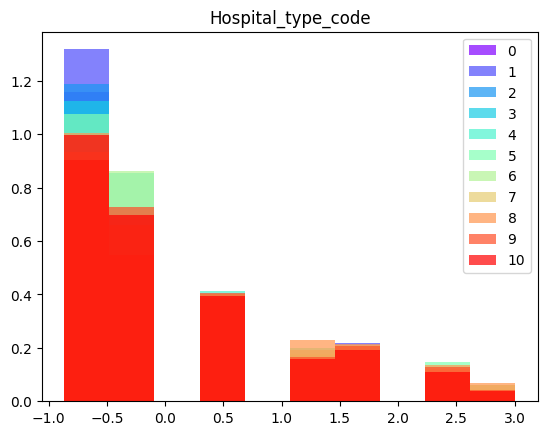

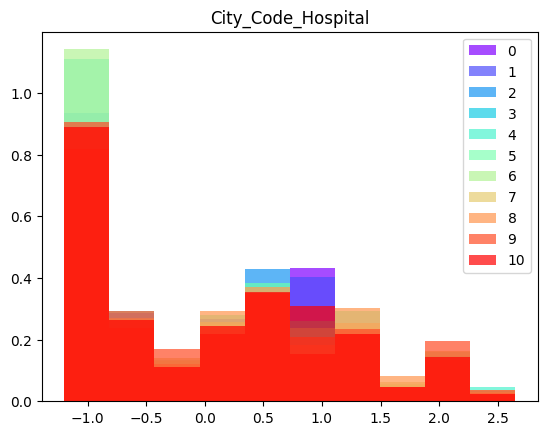

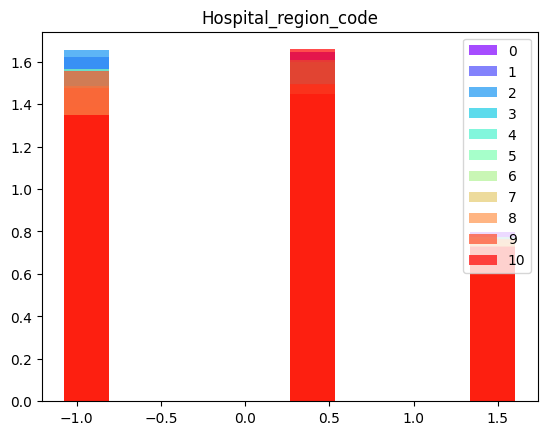

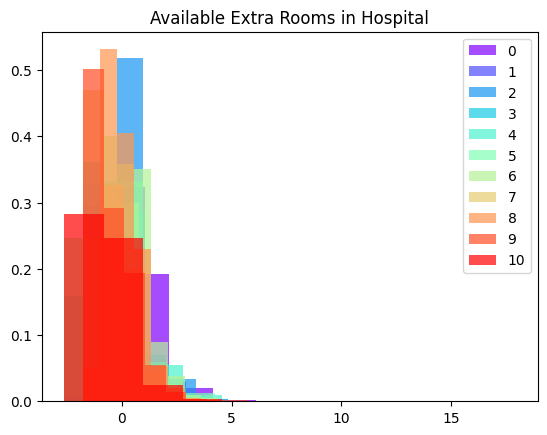

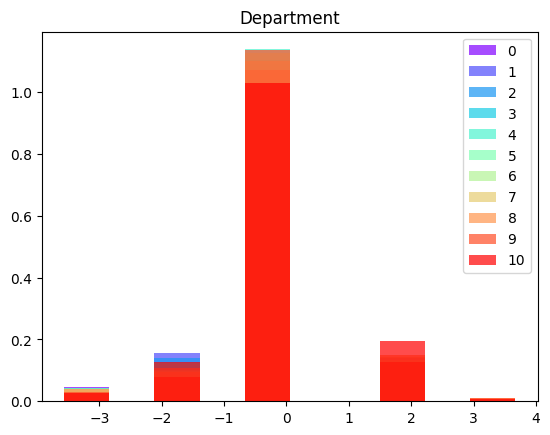

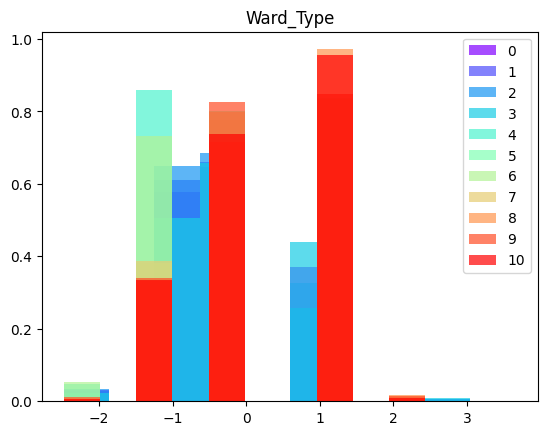

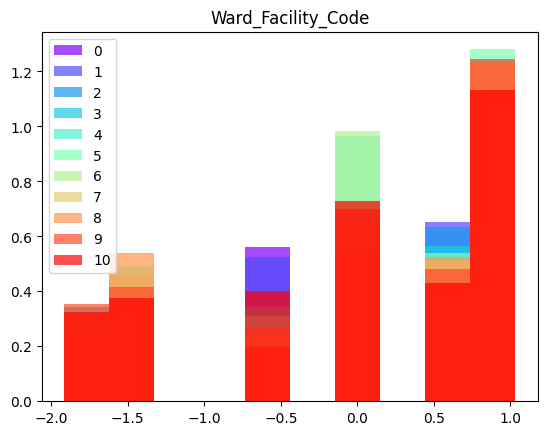

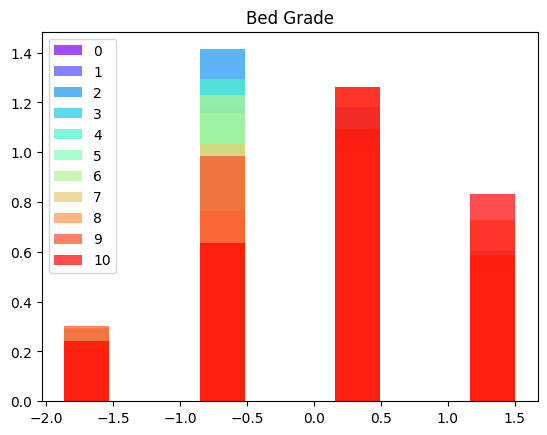

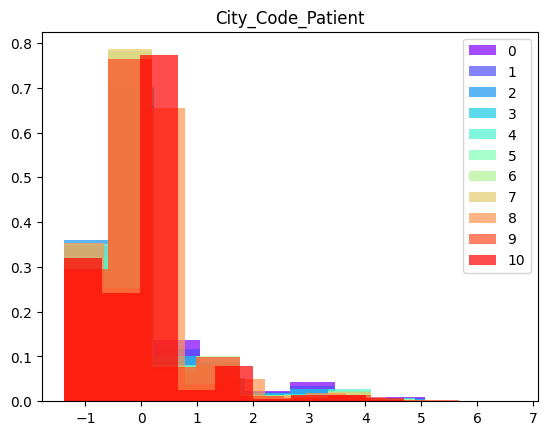

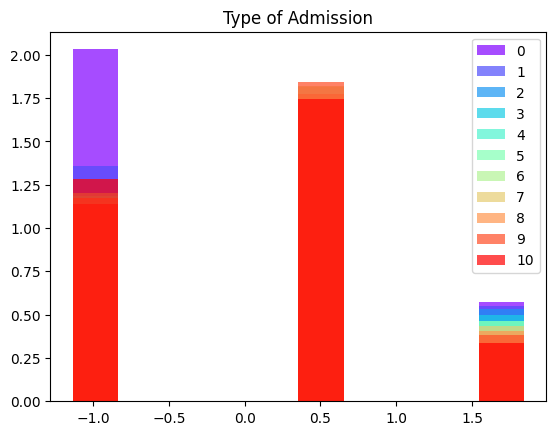

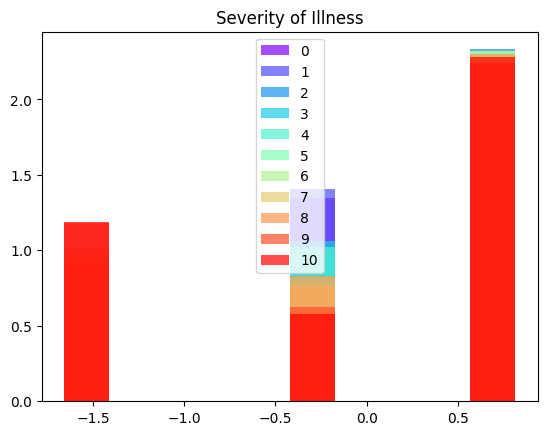

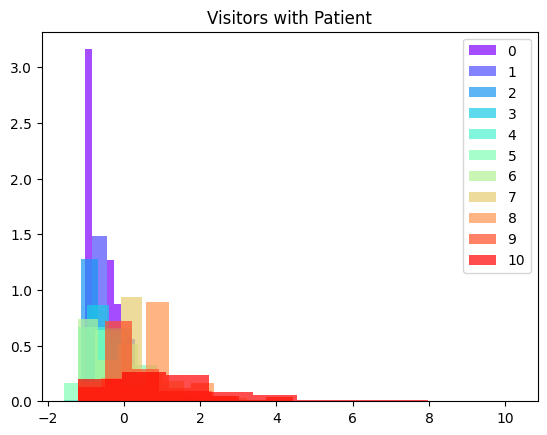

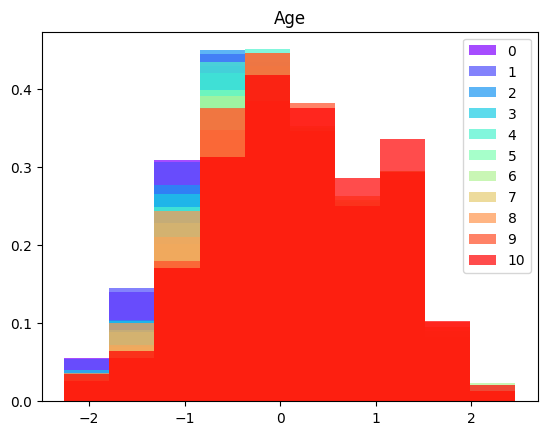

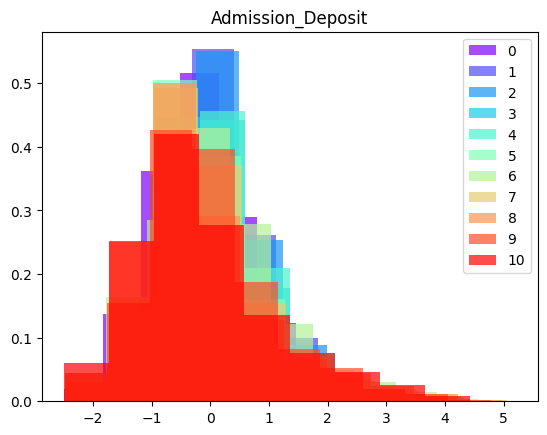

In [22]:
new_data = pd.DataFrame(prepped_data,columns= full_cols)
grapher(new_data)